# Author: Sandesh Basnet

# EDA on wildfire activities in Australia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv

In [3]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv'

df = pd.read_csv(url)

In [4]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [5]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [6]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [7]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month


In [8]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int64
Month                                    int64
dtype: object

In [9]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


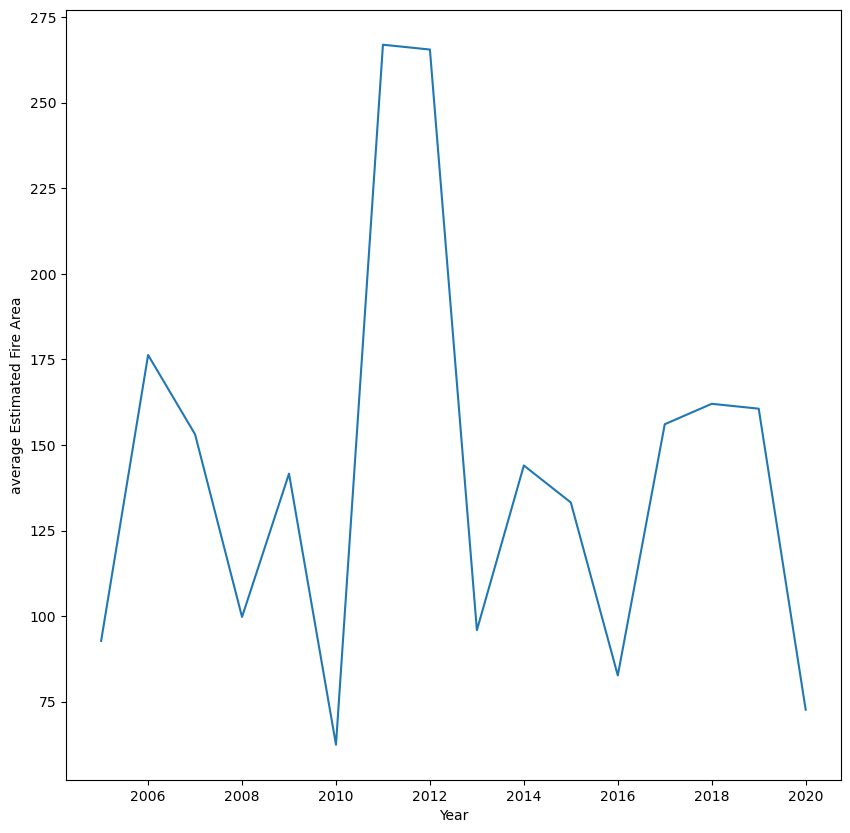

In [10]:
plt.figure(figsize=(10, 10))
df_new= df.groupby(['Year'])['Estimated_fire_area'].mean()
df_new.plot(x= df_new.index, y= df_new.values)
plt.xlabel('Year')
plt.ylabel('average Estimated Fire Area')
plt.show()

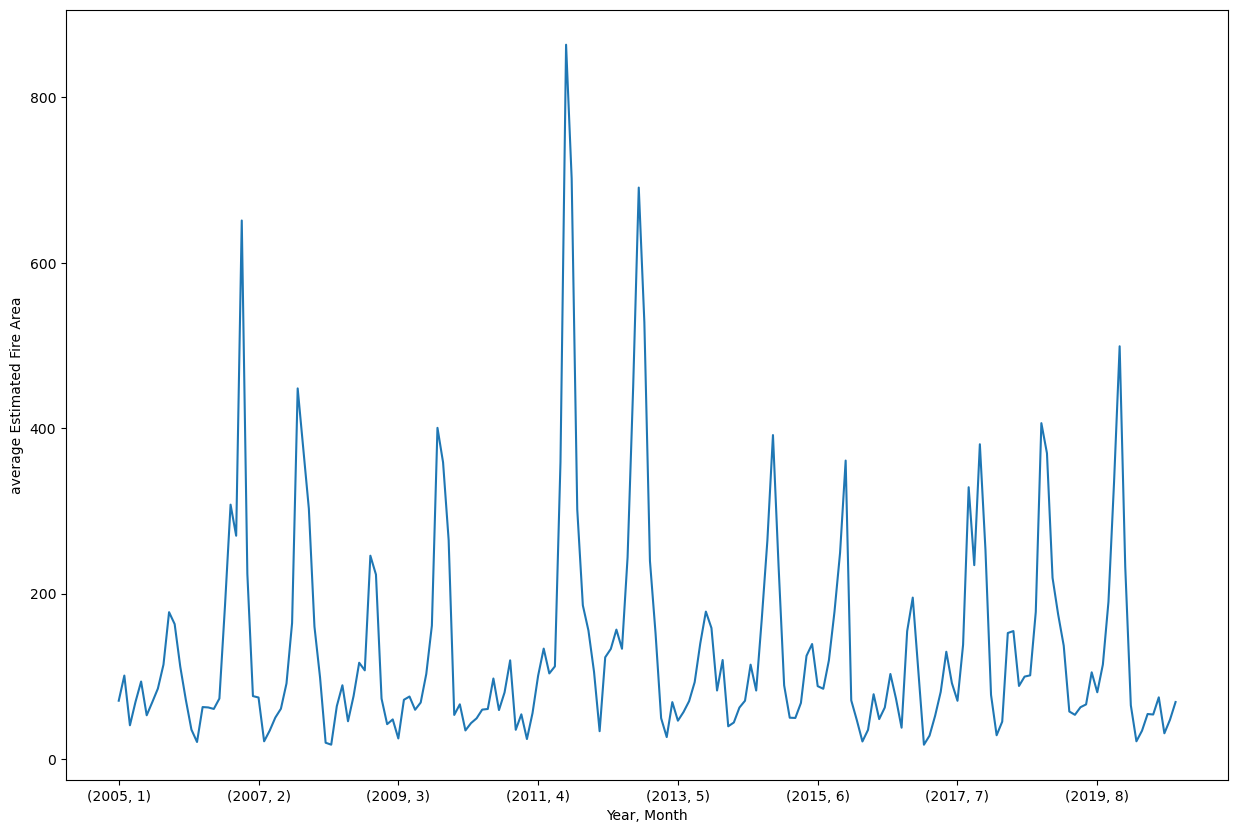

In [11]:
plt.figure(figsize=(15, 10))
df_new= df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()
df_new.plot(x= df_new.index, y= df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('average Estimated Fire Area')
plt.show()

In [12]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

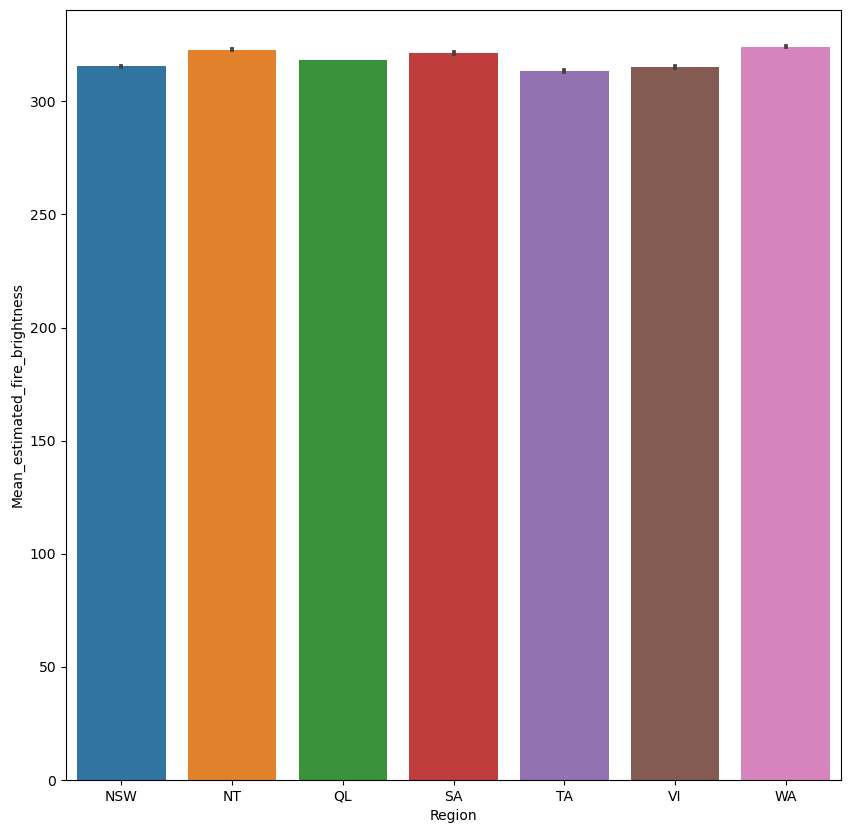

In [13]:
plt.figure(figsize=(10, 10))
sns.barplot(x= 'Region', y= 'Mean_estimated_fire_brightness', data= df)
plt.xlabel('Region')
plt.ylabel('Mean_estimated_fire_brightness')
plt.show()

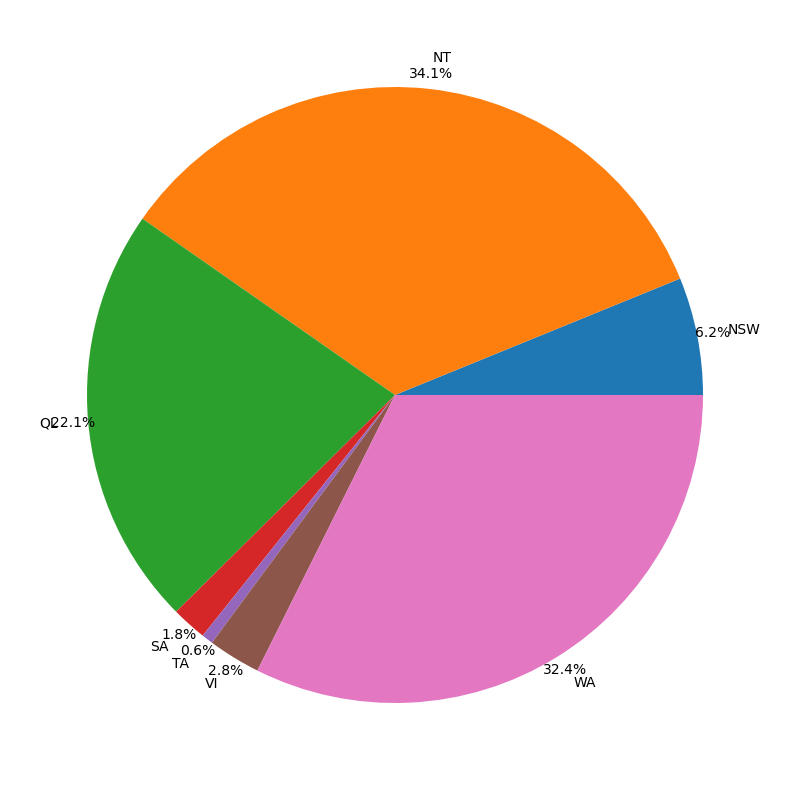

In [14]:
plt.figure(figsize=(10, 10))
region_counts= df.groupby(['Region'])['Count'].sum()
plt.pie(region_counts, labels=region_counts.index, autopct= '%1.1f%%', pctdistance= 1.05)

plt.show()

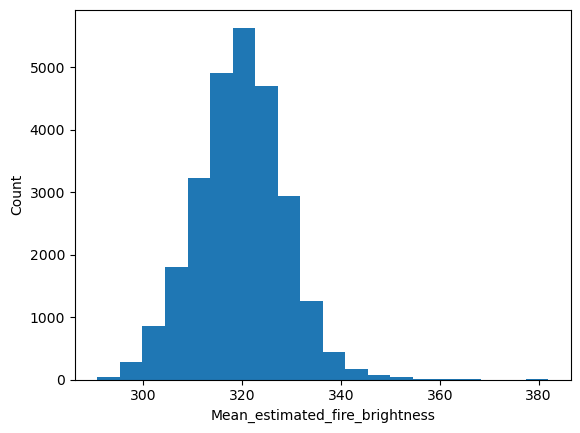

In [15]:
plt.hist(x= df['Mean_estimated_fire_brightness'], bins= 20)
plt.xlabel('Mean_estimated_fire_brightness')
plt.ylabel('Count')
plt.show()

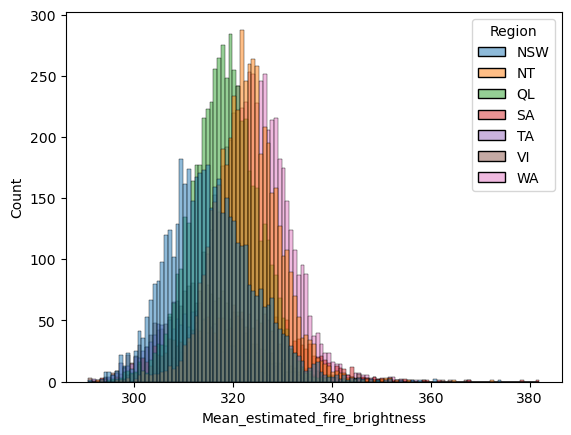

In [16]:
sns.histplot(x= 'Mean_estimated_fire_brightness', data= df, hue='Region')
plt.show()

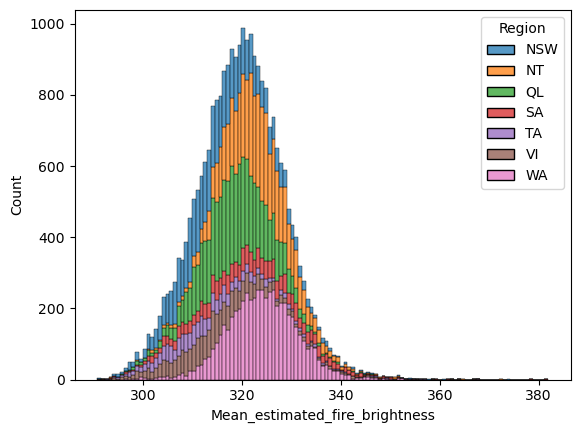

In [17]:
sns.histplot(x= 'Mean_estimated_fire_brightness', data= df, hue='Region', multiple= 'stack')
plt.show()

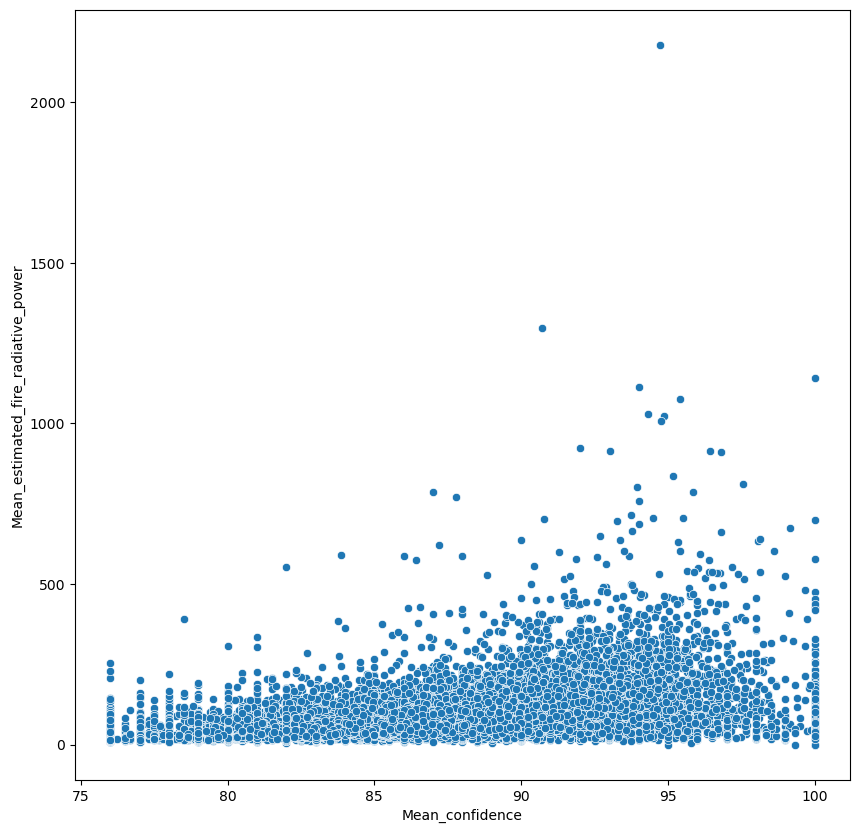

In [18]:
plt.figure(figsize=(10, 10))
sns.scatterplot(y= 'Mean_estimated_fire_radiative_power', x= 'Mean_confidence', data= df)
plt.xlabel('Mean_confidence')
plt.ylabel('Mean_estimated_fire_radiative_power')
plt.show()